# EcoFOCIpy ADCP QC - 19BSP-8A

- mostly interpolated <1hr gaps


In [2]:
import xarray as xa

import numpy as np

import matplotlib.pyplot as plt


In [3]:
xdf = xa.load_dataset('/Users/bell/ecoraid/2019/Moorings/19bsp8a/initial_archive/19bsp8a_velein_0062m.nc')

In [4]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 8418, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 2019-09-24 ... 2020-09-08T17:00:00
  * depth            (depth) float64 -12.0 -8.0 -4.0 -0.0 ... 48.0 52.0 56.0
  * latitude         (latitude) float64 62.2
  * longitude        (longitude) float64 -174.7
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 49.06 ... -10.64
    v_curr_comp      (latitude, longitude, time, depth) float64 -0.04086 ... ...
    w_curr_comp      (latitude, longitude, time, depth) float64 2.0 1.2 ... -0.3
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -8.7 ... 0.2
    agc1             (latitude, longitude, time, depth) float64 60.0 ... nan
    agc2             (latitude, longitude, time, depth) float64 57.0 ... nan
    agc3             (latitude, longitude, time, depth) float64 61.0 ... nan
    agc4             (latitude, longitude, time, depth) float64 62.0 ... nan
Attributes: (12/13)
    Latitude_DegMMddW:                      62 11.760 N
    Longitude_DegMMddN:                     174 40.470 W
    MooringID:                              19BSP-8A
    platform_deployment_date:               2019-09-23T23:38:00Z
    platform_deployment_cruise_name:        DY1908
    platform_recovery_date:                 2020-09-08T17:53:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  EDD - Biodegradable Drogue fabric...
    WaterDepth:                             74.0
    date_created:                           2021-08-06T11:06:20Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [5]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

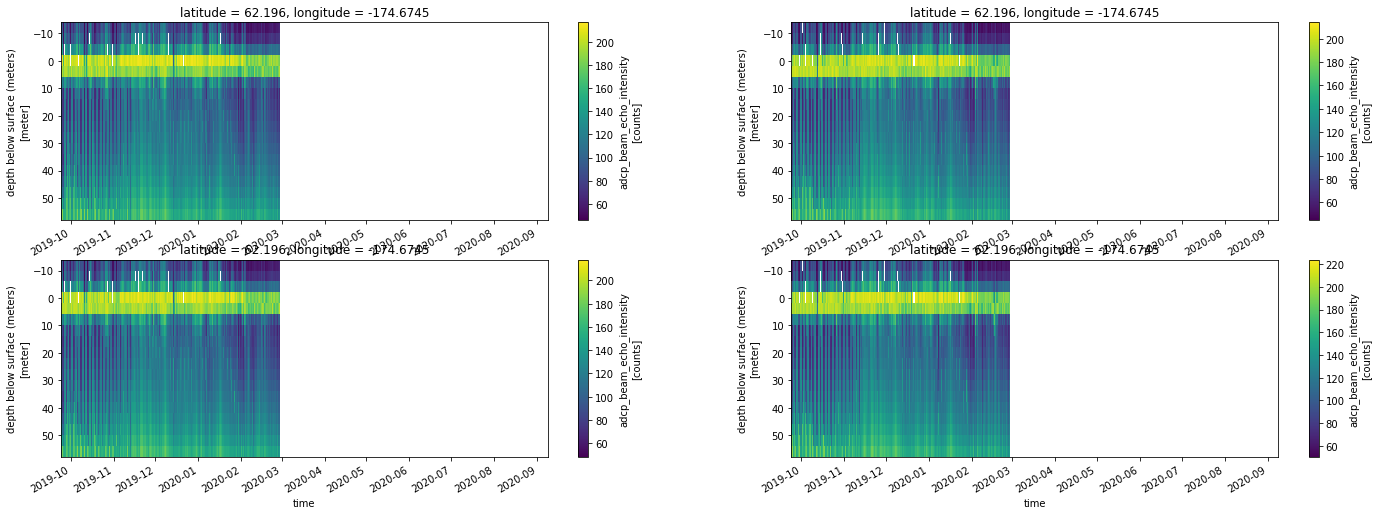

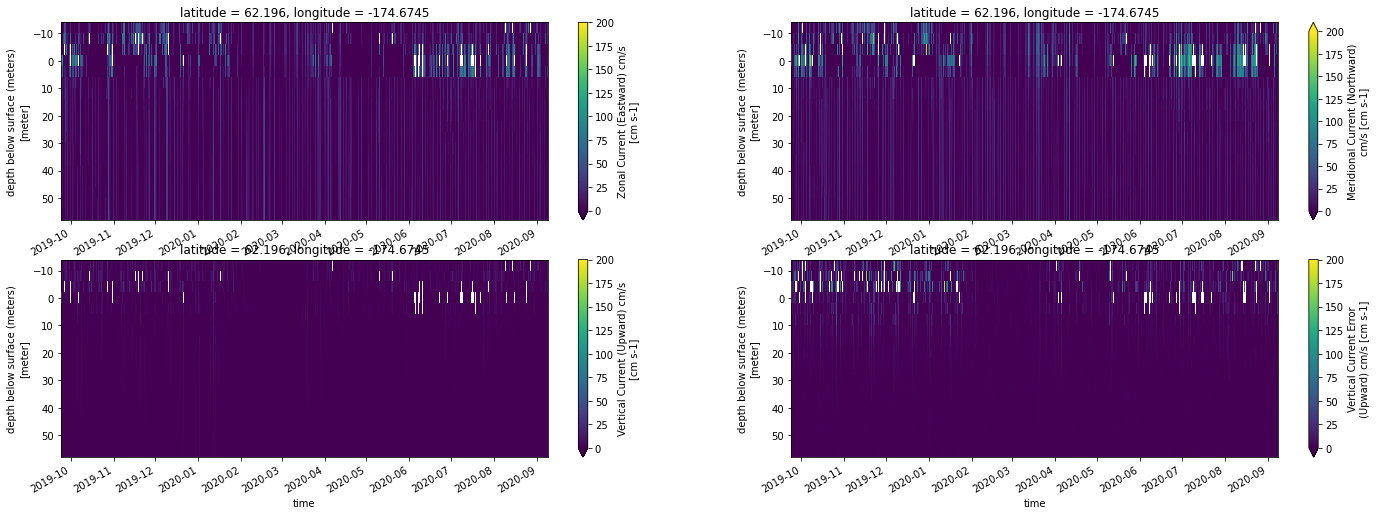

In [6]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [7]:
# xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'c

In [7]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H') #use 2H to fill all up to but not including 2hr gaps (so for hourly data thats just 1hr fills)

In [9]:
xdf.attrs['history'] = xdf.attrs['history']+'  linearly interpolated 1hr gaps'

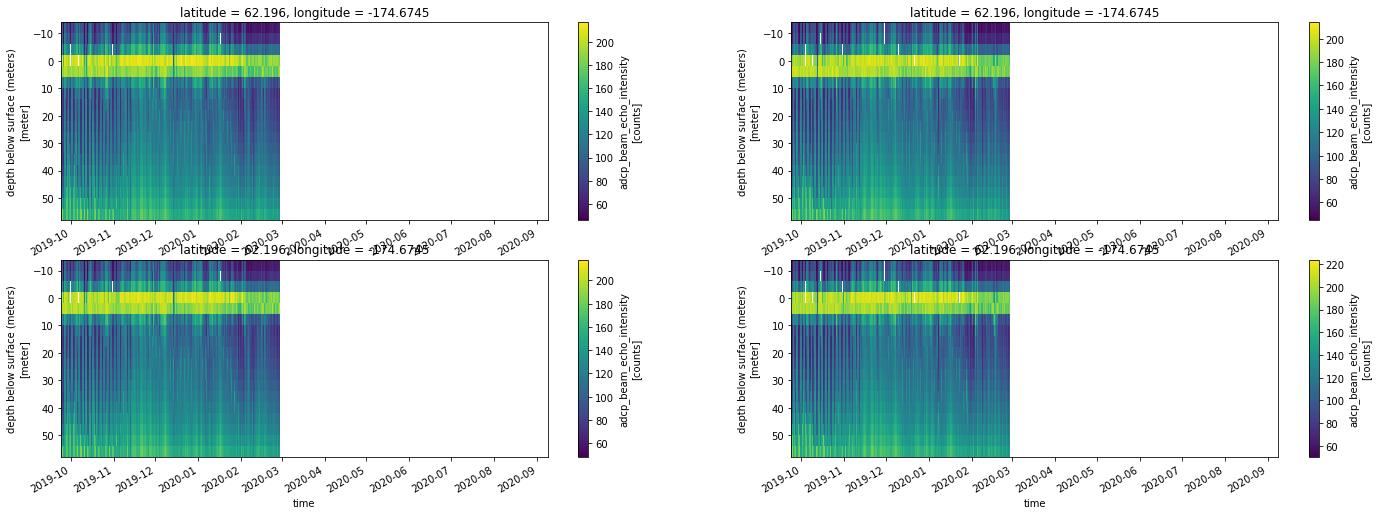

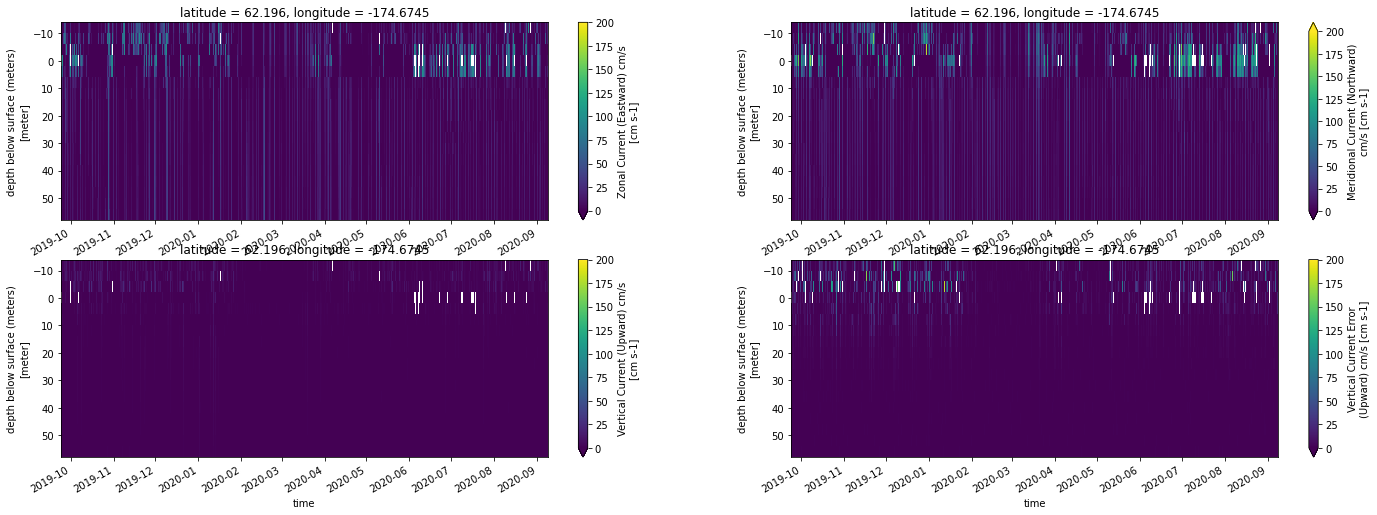

In [10]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [12]:
ixdf.to_netcdf('/Users/bell/ecoraid/2019/Moorings/19bsp8a/final_data_cf/19bsp8a_velein_0062m.nc')